Q1

Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States


In [1]:
# steps to follow
# importing the data set then performing EDA
# feature analysis
# satadarizing or normalizing the data set
# do clustering using different techniques

In [29]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import seaborn as sns
import pylab as pl
import scipy.cluster.hierarchy as sch
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('crime_data.csv')
data
data.rename(columns={'Unnamed: 0':'cities'}, inplace=True)
data

cities  Murder  Assault  UrbanPop  Rape
0          Alabama    13.2      236        58  21.2
1           Alaska    10.0      263        48  44.5
2          Arizona     8.1      294        80  31.0
3         Arkansas     8.8      190        50  19.5
4       California     9.0      276        91  40.6
5         Colorado     7.9      204        78  38.7
6      Connecticut     3.3      110        77  11.1
7         Delaware     5.9      238        72  15.8
8          Florida    15.4      335        80  31.9
9          Georgia    17.4      211        60  25.8
10          Hawaii     5.3       46        83  20.2
11           Idaho     2.6      120        54  14.2
12        Illinois    10.4      249        83  24.0
13         Indiana     7.2      113        65  21.0
14            Iowa     2.2       56        57  11.3
15          Kansas     6.0      115        66  18.0
16        Kentucky     9.7      109        52  16.3
17       Louisiana    15.4      249        66  22.2
18           Maine     2.1       83        51   7.8
19        Maryland    11.3      300        67  27.8
20   Massachusetts     4.4      149        85  16.3
21        Michigan    12.1      255        74  35.1
22       Minnesota     2.7       72        66  14.9
23     Mississippi    16.1      259        44  17.1
24        Missouri     9.0      178        70  28.2
25         Montana     6.0      109        53  16.4
26        Nebraska     4.3      102        62  16.5
27          Nevada    12.2      252        81  46.0
28   New Hampshire     2.1       57        56   9.5
29      New Jersey     7.4      159        89  18.8
30      New Mexico    11.4      285        70  32.1
31        New York    11.1      254        86  26.1
32  North Carolina    13.0      337        45  16.1
33    North Dakota     0.8       45        44   7.3
34            Ohio     7.3      120        75  21.4
35        Oklahoma     6.6      151        68  20.0
36          Oregon     4.9      159        67  29.3
37    Pennsylvania     6.3      106        72  14.9
38    Rhode Island     3.4      174        87   8.3
39  South Carolina    14.4      279        48  22.5
40    South Dakota     3.8       86        45  12.8
41       Tennessee    13.2      188        59  26.9
42           Texas    12.7      201        80  25.5
43            Utah     3.2      120        80  22.9
44         Vermont     2.2       48        32  11.2
45        Virginia     8.5      156        63  20.7
46      Washington     4.0      145        73  26.2
47   West Virginia     5.7       81        39   9.3
48       Wisconsin     2.6       53        66  10.8
49         Wyoming     6.8      161        60  15.6

In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cities    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000

In [5]:
profile  = pp.ProfileReport(data)
profile

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

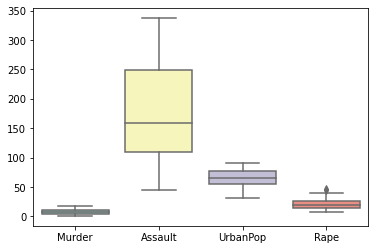

In [7]:
sns.boxplot(data=data) 
#rape column has some outliers

In [9]:
#standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.iloc[:,1:])

In [11]:
#normalizing the data
array = data.iloc[:,1:]

norm_scaler = MinMaxScaler(feature_range=(0,1))
normscaled = norm_scaler.fit_transform(array)

#transformed data
set_printoptions(precision=2)
print(normscaled[:5])

[[0.75 0.65 0.44 0.36]
 [0.55 0.75 0.27 0.96]
 [0.44 0.85 0.81 0.61]
 [0.48 0.5  0.31 0.32]
 [0.49 0.79 1.   0.86]]


C:\Users\amanu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


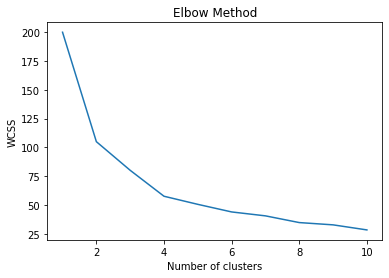

In [12]:
# kmeans clustering
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
clusterskmeans = KMeans(4, random_state=5)
clusterskmeans.fit(scaled_data)

KMeans(n_clusters=4, random_state=5)

In [15]:
# clusters labels
clusterskmeans.labels_

array([1, 3, 3, 1, 3, 3, 2, 2, 3, 1, 2, 0, 3, 2, 0, 2, 0, 1, 0, 3, 2, 3,
       0, 1, 3, 0, 0, 3, 0, 2, 3, 3, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 3, 2,
       0, 2, 2, 0, 0, 2])

In [16]:
#Assign clusters to the data set
data_kmeans = data.copy()
data_kmeans['clusters_kmeans'] = clusterskmeans.labels_

In [17]:
clusterskmeans.cluster_centers_

array([[-0.97, -1.12, -0.94, -0.98],
       [ 1.43,  0.88, -0.82,  0.02],
       [-0.49, -0.39,  0.58, -0.26],
       [ 0.7 ,  1.05,  0.73,  1.29]])

In [19]:
data_kmeans.groupby('clusters_kmeans').agg(['mean'])
data_kmeans

cities  Murder  Assault  UrbanPop  Rape  clusters_kmeans
0          Alabama    13.2      236        58  21.2                1
1           Alaska    10.0      263        48  44.5                3
2          Arizona     8.1      294        80  31.0                3
3         Arkansas     8.8      190        50  19.5                1
4       California     9.0      276        91  40.6                3
5         Colorado     7.9      204        78  38.7                3
6      Connecticut     3.3      110        77  11.1                2
7         Delaware     5.9      238        72  15.8                2
8          Florida    15.4      335        80  31.9                3
9          Georgia    17.4      211        60  25.8                1
10          Hawaii     5.3       46        83  20.2                2
11           Idaho     2.6      120        54  14.2                0
12        Illinois    10.4      249        83  24.0                3
13         Indiana     7.2      113        65  21.0                2
14            Iowa     2.2       56        57  11.3                0
15          Kansas     6.0      115        66  18.0                2
16        Kentucky     9.7      109        52  16.3                0
17       Louisiana    15.4      249        66  22.2                1
18           Maine     2.1       83        51   7.8                0
19        Maryland    11.3      300        67  27.8                3
20   Massachusetts     4.4      149        85  16.3                2
21        Michigan    12.1      255        74  35.1                3
22       Minnesota     2.7       72        66  14.9                0
23     Mississippi    16.1      259        44  17.1                1
24        Missouri     9.0      178        70  28.2                3
25         Montana     6.0      109        53  16.4                0
26        Nebraska     4.3      102        62  16.5                0
27          Nevada    12.2      252        81  46.0                3
28   New Hampshire     2.1       57        56   9.5                0
29      New Jersey     7.4      159        89  18.8                2
30      New Mexico    11.4      285        70  32.1                3
31        New York    11.1      254        86  26.1                3
32  North Carolina    13.0      337        45  16.1                1
33    North Dakota     0.8       45        44   7.3                0
34            Ohio     7.3      120        75  21.4                2
35        Oklahoma     6.6      151        68  20.0                2
36          Oregon     4.9      159        67  29.3                2
37    Pennsylvania     6.3      106        72  14.9                2
38    Rhode Island     3.4      174        87   8.3                2
39  South Carolina    14.4      279        48  22.5                1
40    South Dakota     3.8       86        45  12.8                0
41       Tennessee    13.2      188        59  26.9                1
42           Texas    12.7      201        80  25.5                3
43            Utah     3.2      120        80  22.9                2
44         Vermont     2.2       48        32  11.2                0
45        Virginia     8.5      156        63  20.7                2
46      Washington     4.0      145        73  26.2                2
47   West Virginia     5.7       81        39   9.3                0
48       Wisconsin     2.6       53        66  10.8                0
49         Wyoming     6.8      161        60  15.6                2

In [20]:
# data visualization dimensionality reduction
pca = PCA(n_components=2).fit(scaled_data)
pca_2d = pca.transform(scaled_data)

Text(0.5, 1.0, 'Crime dataset with K-Means Clustering')

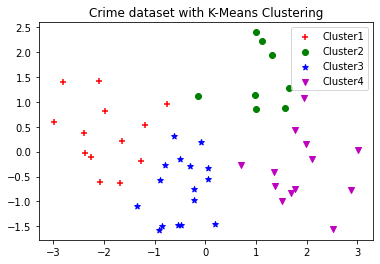

In [22]:
for i in range(0, pca_2d.shape[0]):
    if data_kmeans.clusters_kmeans[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='+')
    elif data_kmeans.clusters_kmeans[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif data_kmeans.clusters_kmeans[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')
    elif data_kmeans.clusters_kmeans[i] == 3:
        c4 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='m', marker='v')
 
pl.legend([c1, c2, c3, c4], ['Cluster1', 'Cluster2',
    'Cluster3', 'Cluster4'])
pl.title('Crime dataset with K-Means Clustering')

In [23]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=1, min_samples=4)
dbscan.fit(scaled_data)

DBSCAN(eps=1, min_samples=4)

In [26]:
data_dbscan = data.copy()
data_dbscan['clusters_dbscan'] = dbscan.labels_
data_dbscan['clusters_dbscan'].value_counts()
data_dbscan.groupby('clusters_dbscan').agg(['mean'])

Murder     Assault   UrbanPop       Rape
                      mean        mean       mean       mean
clusters_dbscan                                             
-1               11.005556  247.166667  70.666667  28.766667
 0               14.050000  238.000000  57.750000  23.200000
 1                4.825000  112.035714  63.357143  16.107143

In [27]:
# visualization of the data by dimensionality reduction
pca_db = PCA(n_components=2).fit(scaled_data)
pca_2d_db = pca_db.transform(scaled_data)

Text(0.5, 1.0, 'Crime dataset with DBSCAN Clustering')

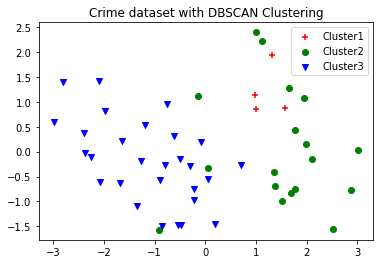

In [28]:
for i in range(0, pca_2d_db.shape[0]):
    if data_dbscan.clusters_dbscan[i] == 0:
        c1 = pl.scatter(pca_2d_db[i,0],pca_2d_db[i,1],c='r', marker='+')
    elif data_dbscan.clusters_dbscan[i] == -1:
        c2 = pl.scatter(pca_2d_db[i,0],pca_2d_db[i,1],c='g', marker='o')
    elif data_dbscan.clusters_dbscan[i] == 1:
        c3 = pl.scatter(pca_2d_db[i,0],pca_2d_db[i,1],c='b', marker='v')
        
pl.legend([c1, c2, c3], ['Cluster1', 'Cluster2', 'Cluster3'])
pl.title('Crime dataset with DBSCAN Clustering')

In [ ]:
# Agglomerative

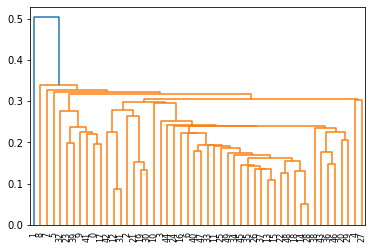

In [30]:
dendrogram = sch.dendrogram(sch.linkage(normscaled, method='single'))

In [31]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(normscaled)

In [33]:
data_agglo = data.copy()
data_agglo['clusters_agglo'] = y_hc
data_agglo.clusters_agglo.value_counts()

1    20
3    12
2    10
0     8
Name: clusters_agglo, dtype: int64

In [34]:
data_agglo.groupby('clusters_agglo').agg(['mean'])

Murder     Assault   UrbanPop     Rape
                     mean        mean       mean     mean
clusters_agglo                                           
0               14.087500  252.750000  53.500000  24.5375
1                5.715000  132.300000  70.800000  18.1000
2                3.180000   78.700000  49.300000  11.6300
3               10.883333  256.916667  78.333333  32.2500

In [35]:
pca_agg = PCA(n_components=2).fit(normscaled)
pca_2d_agg = pca_agg.transform(normscaled)

Text(0.5, 1.0, 'Crime dataset with Heirarchial Agglomerative Clustering')

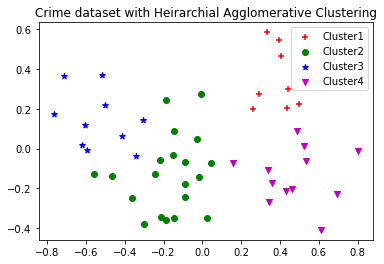

In [36]:
for i in range(0, pca_2d_agg.shape[0]):
    if data_agglo.clusters_agglo[i] == 0:
        c1 = pl.scatter(pca_2d_agg[i,0],pca_2d_agg[i,1],c='r', marker='+')
    elif data_agglo.clusters_agglo[i] == 1:
        c2 = pl.scatter(pca_2d_agg[i,0],pca_2d_agg[i,1],c='g', marker='o')
    elif data_agglo.clusters_agglo[i] == 2:
        c3 = pl.scatter(pca_2d_agg[i,0],pca_2d_agg[i,1],c='b', marker='*')
    elif data_agglo.clusters_agglo[i] == 3:
        c4 = pl.scatter(pca_2d_agg[i,0],pca_2d_agg[i,1],c='m', marker='v')
        
pl.legend([c1, c2, c3, c4], ['Cluster1', 'Cluster2',
    'Cluster3', 'Cluster4'])
pl.title('Crime dataset with Heirarchial Agglomerative Clustering')

In [ ]:
# kmeans clustering would be the best clustering technique for above data set.

--------------------------------------------------------------------------------------------------------------------------------

Q2

Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not


 

In [37]:
data = pd.read_excel("EastWestAirlines.xlsx",sheet_name='data',index_col=0)
data

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
1       28143           0          1          1          1          174   
2       19244           0          1          1          1          215   
3       41354           0          1          1          1         4123   
4       14776           0          1          1          1          500   
5       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
4017    18476           0          1          1          1         8525   
4018    64385           0          1          1          1          981   
4019    73597           0          3          1          1        25447   
4020    54899           0          1          1          1          500   
4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1               1                  0                0               7000   
2               2                  0                0               6968   
3               4                  0                0               7034   
4               1                  0                0               6952   
5              26               2077                4               6935   
...           ...                ...              ...                ...   
4017            4                200                1               1403   
4018            5                  0                0               1395   
4019            8                  0                0               1402   
4020            1                500                1               1401   
4021            0                  0                0               1398   

      Award?  
ID#           
1          0  
2          0  
3          0  
4          0  
5          1  
...      ...  
4017       1  
4018       1  
4019       1  
4020       0  
4021       0  

[3999 rows x 11 columns]

In [38]:
data.info()
data.describe()
# no - null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


Balance    Qual_miles    cc1_miles    cc2_miles    cc3_miles  \
count  3.999000e+03   3999.000000  3999.000000  3999.000000  3999.000000   
mean   7.360133e+04    144.114529     2.059515     1.014504     1.012253   
std    1.007757e+05    773.663804     1.376919     0.147650     0.195241   
min    0.000000e+00      0.000000     1.000000     1.000000     1.000000   
25%    1.852750e+04      0.000000     1.000000     1.000000     1.000000   
50%    4.309700e+04      0.000000     1.000000     1.000000     1.000000   
75%    9.240400e+04      0.000000     3.000000     1.000000     1.000000   
max    1.704838e+06  11148.000000     5.000000     3.000000     5.000000   

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count    3999.000000   3999.00000        3999.000000      3999.000000   
mean    17144.846212     11.60190         460.055764         1.373593   
std     24150.967826      9.60381        1400.209171         3.793172   
min         0.000000      0.00000           0.000000         0.000000   
25%      1250.000000      3.00000           0.000000         0.000000   
50%      7171.000000     12.00000           0.000000         0.000000   
75%     23800.500000     17.00000         311.000000         1.000000   
max    263685.000000     86.00000       30817.000000        53.000000   

       Days_since_enroll       Award?  
count         3999.00000  3999.000000  
mean          4118.55939     0.370343  
std           2065.13454     0.482957  
min              2.00000     0.000000  
25%           2330.00000     0.000000  
50%           4096.00000     0.000000  
75%           5790.50000     1.000000  
max           8296.00000     1.000000

<AxesSubplot:>

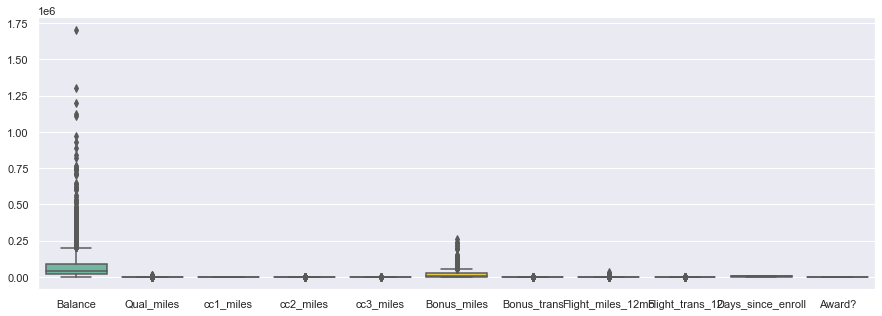

In [41]:
sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(data=data) #outliers in Balance and bonus miles

In [43]:
profile = pp.ProfileReport(data)
profile

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [47]:
# standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.iloc[:,0:])

In [48]:
# normalizing the data
array = data.iloc[:,0:]

norm_scaler = MinMaxScaler(feature_range=(0,1))
normscaled = norm_scaler.fit_transform(array)

#transformed data
set_printoptions(precision=2)
print(normscaled[:5])


[[1.65e-02 0.00e+00 0.00e+00 0.00e+00 0.00e+00 6.60e-04 1.16e-02 0.00e+00
  0.00e+00 8.44e-01 0.00e+00]
 [1.13e-02 0.00e+00 0.00e+00 0.00e+00 0.00e+00 8.15e-04 2.33e-02 0.00e+00
  0.00e+00 8.40e-01 0.00e+00]
 [2.43e-02 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.56e-02 4.65e-02 0.00e+00
  0.00e+00 8.48e-01 0.00e+00]
 [8.67e-03 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.90e-03 1.16e-02 0.00e+00
  0.00e+00 8.38e-01 0.00e+00]
 [5.73e-02 0.00e+00 7.50e-01 0.00e+00 0.00e+00 1.64e-01 3.02e-01 6.74e-02
  7.55e-02 8.36e-01 1.00e+00]]


Text(0, 0.5, 'WCSS')

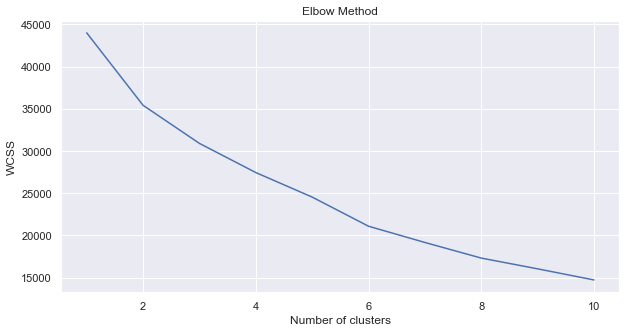

In [49]:
# k means clustering
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

sns.set(rc={'figure.figsize':(10,5)}) 
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [50]:
clusters_kmeans = KMeans(5, random_state=5)
clusters_kmeans.fit(scaled_data)

KMeans(n_clusters=5, random_state=5)

In [52]:
data_kmeans = data.copy()
data_kmeans['clusters_kmeans'] = clusters_kmeans.labels_

In [53]:
data_kmeans.groupby('clusters_kmeans').agg(['mean'])

Balance  Qual_miles cc1_miles cc2_miles cc3_miles  \
                          mean        mean      mean      mean      mean   
clusters_kmeans                                                            
0                138183.867257  129.798673  4.113938  1.000000  1.053097   
1                 43712.031564   72.384505  1.317551  1.000000  1.000478   
2                 68876.581395   23.255814  1.139535  2.348837  1.000000   
3                 58396.432890  237.233374  1.700121  1.000000  1.000000   
4                199672.328358  824.089552  2.291045  1.000000  1.000000   

                  Bonus_miles Bonus_trans Flight_miles_12mo Flight_trans_12  \
                         mean        mean              mean            mean   
clusters_kmeans                                                               
0                48981.256637   19.898230        380.765487        1.164823   
1                 4833.098039    7.184601        157.741750        0.471066   
2                14689.837209   17.534884        582.627907        2.209302   
3                10731.019347   10.639661        420.238210        1.290206   
4                34857.910448   28.597015       5918.828358       17.111940   

                Days_since_enroll    Award?  
                             mean      mean  
clusters_kmeans                              
0                     5027.533186  0.587389  
1                     3639.517934  0.000000  
2                     3968.930233  0.395349  
3                     4246.882709  0.995163  
4                     4717.619403  0.820896

In [54]:
#visualization of data by dimesionality reduction
pca = PCA(n_components=2).fit(scaled_data)
pca_2d = pca.transform(scaled_data)

Text(0.5, 1.0, 'Airline dataset with K-Means Clustering')

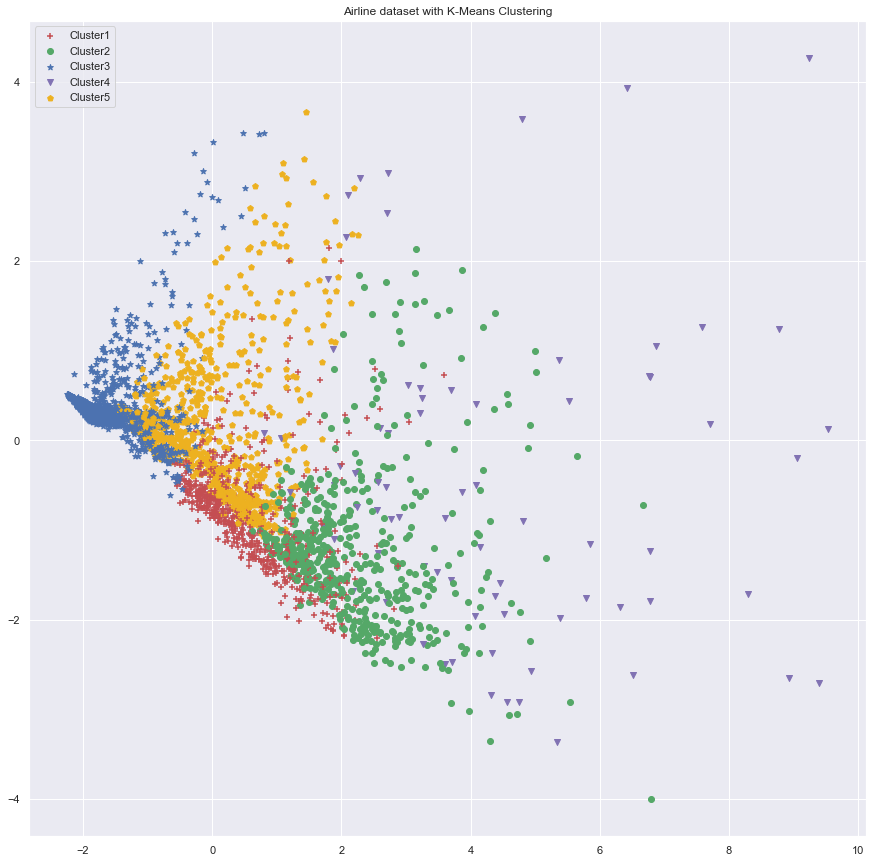

In [62]:
sns.set(rc={'figure.figsize':(15,15)})

for i in range(0, pca_2d.shape[0]):
    if kmeans.labels_[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='+')
    elif kmeans.labels_[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif kmeans.labels_[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')
    elif kmeans.labels_[i] == 3:
        c4 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='m', marker='v')
    elif kmeans.labels_[i] == 4:
        c5 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='#EDB120', marker='p')
        
pl.legend([c1, c2, c3, c4, c5], ['Cluster1', 'Cluster2','Cluster3', 'Cluster4','Cluster5'])
pl.title('Airline dataset with K-Means Clustering')

In [57]:
# DBSCAN clustering
dbscan = DBSCAN(eps=2, min_samples = 8)
dbscan.fit(scaled_data)

DBSCAN(eps=2, min_samples=8)

In [59]:
data_dbscan = data.copy()
data_dbscan['clusters_dbscan'] = dbscan.labels_
data_dbscan['clusters_dbscan'].value_counts()

 0    2445
 1    1314
-1     215
 2      16
 3       9
Name: clusters_dbscan, dtype: int64

In [60]:
data_dbscan.groupby('clusters_dbscan').agg(['mean'])

Balance   Qual_miles cc1_miles cc2_miles cc3_miles  \
                          mean         mean      mean      mean      mean   
clusters_dbscan                                                             
-1               233708.553488  1580.251163  2.730233  1.111628  1.227907   
 0                57829.535378    43.355010  1.697342  1.000000  1.000000   
 1                77324.045662    99.358447  2.643836  1.000000  1.000000   
 2                39218.500000     0.000000  1.000000  2.000000  1.000000   
 3                51096.000000     0.000000  1.000000  3.000000  1.000000   

                  Bonus_miles Bonus_trans Flight_miles_12mo Flight_trans_12  \
                         mean        mean              mean            mean   
clusters_dbscan                                                               
-1               49490.781395   25.939535       3574.990698       10.297674   
 0                9804.722699    8.918200        189.630266        0.557873   
 1               25618.030441   14.207763        459.470320        1.445967   
 2                9189.250000   13.500000        209.375000        0.812500   
 3               15561.666667   14.333333         44.444444        0.222222   

                Days_since_enroll    Award?  
                             mean      mean  
clusters_dbscan                              
-1                    4868.106977  0.776744  
 0                    3817.516973  0.000000  
 1                    4566.999239  1.000000  
 2                    3511.187500  0.000000  
 3                    3603.444444  0.000000

In [61]:
pca_db = PCA(n_components=2).fit(scaled_data)
pca_2d_db = pca_db.transform(scaled_data)

Text(0.5, 1.0, 'Airline dataset with DBSCAN Clustering')

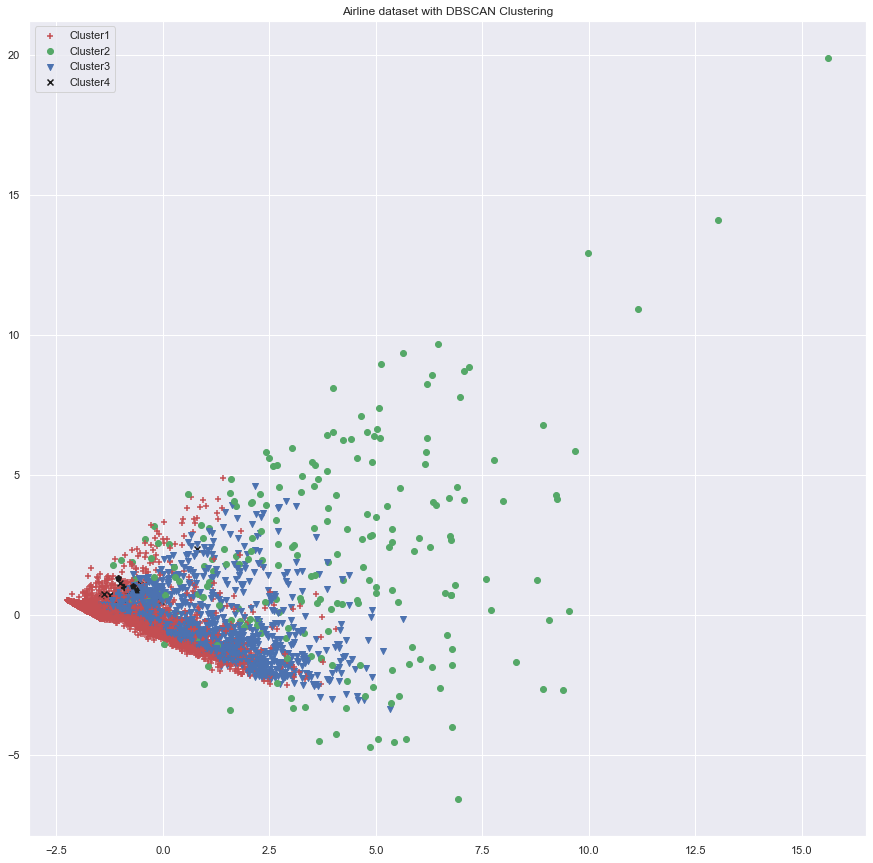

In [65]:
sns.set(rc={'figure.figsize':(15,15)})

for i in range(0, pca_2d_db.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = pl.scatter(pca_2d_db[i,0],pca_2d_db[i,1],c='r', marker='+')
    elif dbscan.labels_[i] == -1:
        c2 = pl.scatter(pca_2d_db[i,0],pca_2d_db[i,1],c='g', marker='o')
    elif dbscan.labels_[i] == 1:
        c3 = pl.scatter(pca_2d_db[i,0],pca_2d_db[i,1],c='b', marker='v')
    elif dbscan.labels_[i] == 2:
        c4 = pl.scatter(pca_2d_db[i,0],pca_2d_db[i,1],c='k', marker='x')
    elif dbscan.labels_[i] == 3:
        c5 = pl.scatter(pca_2d_db[i,0],pca_2d_db[i,1],c='k', marker='p')
        
pl.legend([c1, c2, c3,c4], ['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4'])
pl.title('Airline dataset with DBSCAN Clustering')

In [ ]:
# Heirarchial Agglomerative Clustering

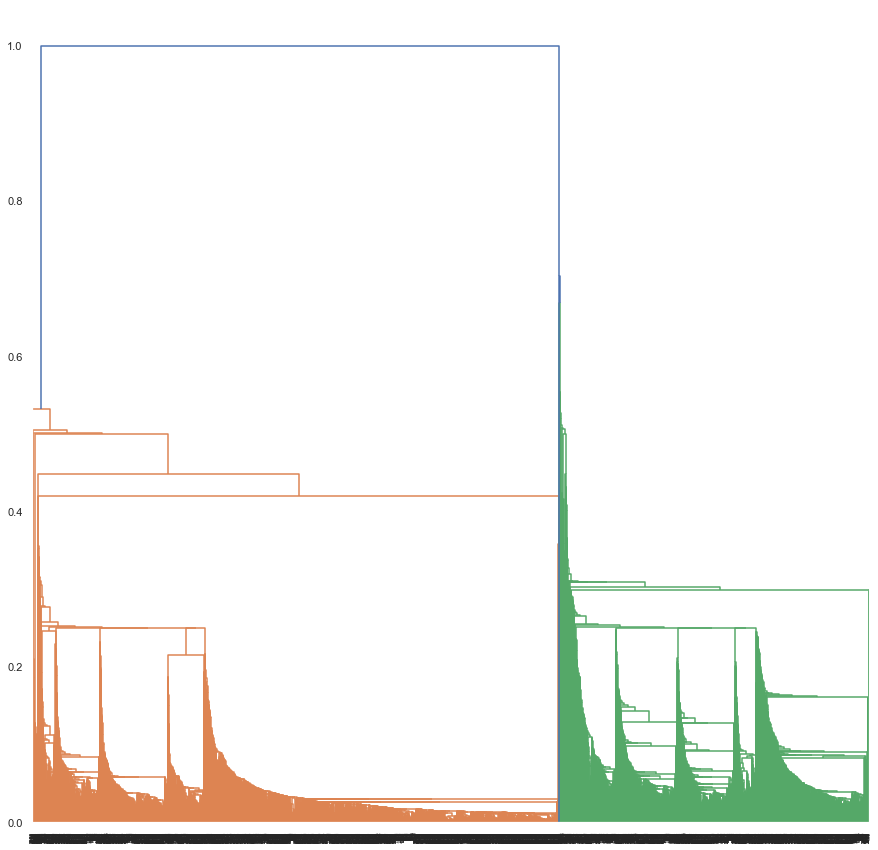

In [66]:
dendrogram = sch.dendrogram(sch.linkage(normscaled, method='single'))

In [67]:
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(normscaled)

In [68]:
data_agglo = data.copy()
data_agglo['clusters_agglo'] = y_hc
data_agglo.clusters_agglo.value_counts()

0    2495
2    1144
1     325
4      31
3       4
Name: clusters_agglo, dtype: int64

In [69]:
data_agglo.groupby('clusters_agglo').agg(['mean'])

Balance  Qual_miles cc1_miles cc2_miles cc3_miles  \
                         mean        mean      mean      mean      mean   
clusters_agglo                                                            
0                59968.433667   88.883768  1.712224  1.000401  1.011222   
1               157084.578462  208.673846  4.661538  1.000000  1.061538   
2                80173.963287  248.550699  2.104895  1.009615  1.000874   
3               131999.500000  347.000000  2.500000  1.000000  1.000000   
4                45515.064516   32.258065  1.000000  2.483871  1.000000   

                 Bonus_miles Bonus_trans Flight_miles_12mo Flight_trans_12  \
                        mean        mean              mean            mean   
clusters_agglo                                                               
0               10271.530261    9.105812        227.797194        0.656112   
1               70477.086154   23.249231       1019.433846        3.196923   
2               16882.864510   13.412587        739.958916        2.236888   
3               65634.250000   69.250000      19960.000000       49.250000   
4               14618.870968   16.129032        443.225806        1.967742   

               Days_since_enroll    Award?  
                            mean      mean  
clusters_agglo                              
0                    3825.392786  0.000802  
1                    5770.572308  1.000000  
2                    4304.383741  1.000000  
3                    2200.250000  1.000000  
4                    3784.258065  0.193548

In [70]:
pca_agg = PCA(n_components=2).fit(normscaled)
pca_2d_agg = pca_agg.transform(normscaled)

Text(0.5, 1.0, 'Airline dataset with Heirarchial Agglo Clustering')

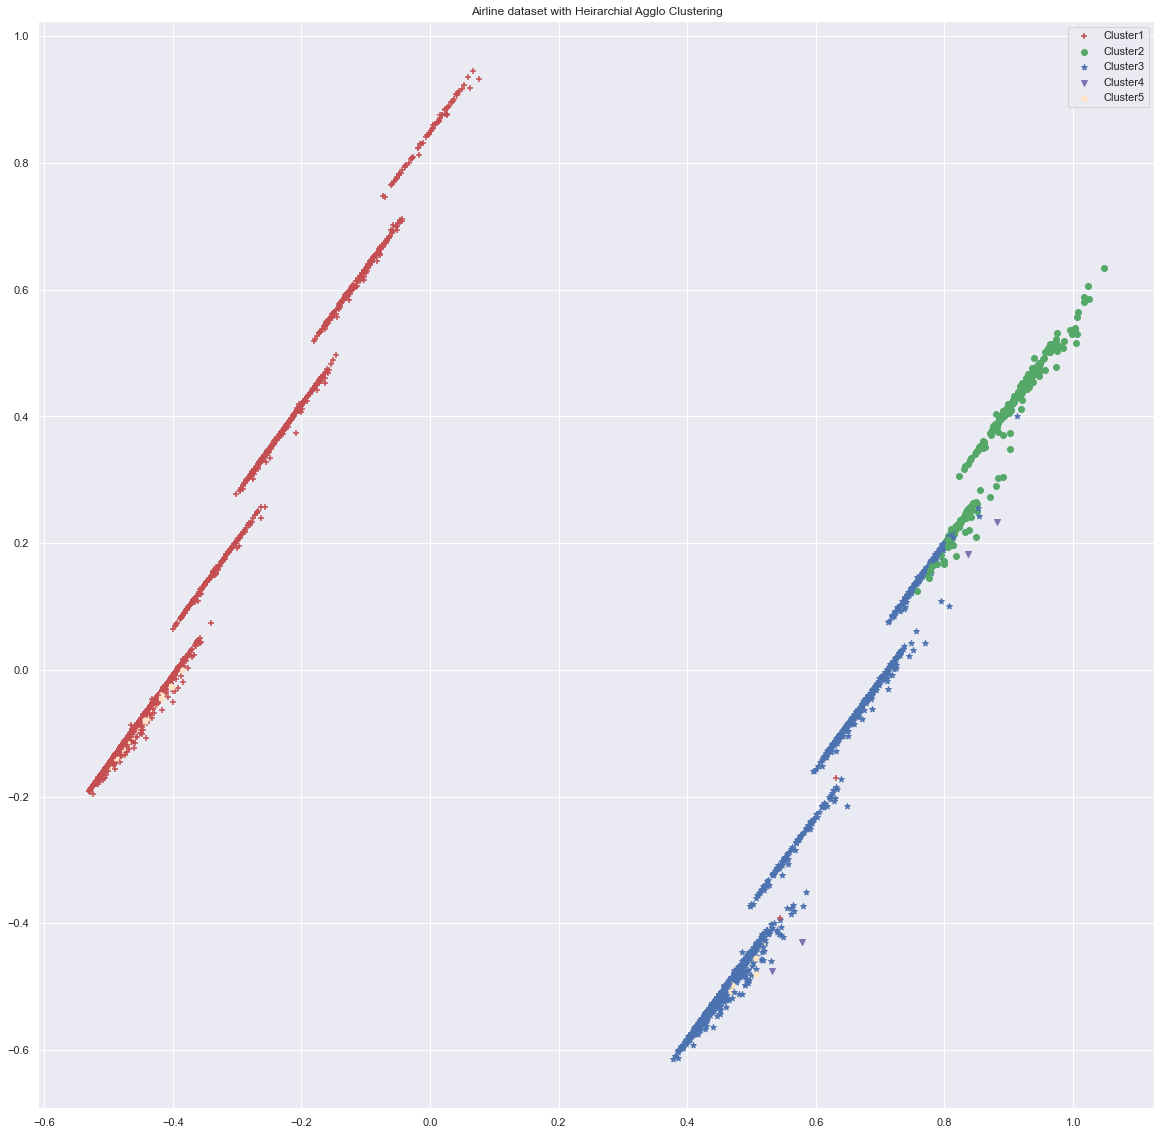

In [74]:
sns.set(rc={'figure.figsize':(20,20)})

for i in range(0, pca_2d_agg.shape[0]):
    if y_hc[i] == 0:
        c1 = pl.scatter(pca_2d_agg[i,0],pca_2d_agg[i,1],c='r', marker='+')
    elif y_hc[i] == 1:
        c2 = pl.scatter(pca_2d_agg[i,0],pca_2d_agg[i,1],c='g', marker='o')
    elif y_hc[i] == 2:
        c3 = pl.scatter(pca_2d_agg[i,0],pca_2d_agg[i,1],c='b', marker='*')
    elif y_hc[i] == 3:
        c4 = pl.scatter(pca_2d_agg[i,0],pca_2d_agg[i,1],c='m', marker='v')
    elif y_hc[i] == 4:
        c5 = pl.scatter(pca_2d_agg[i,0],pca_2d_agg[i,1],c='#FFE4C4', marker='p')
  
        
pl.legend([c1, c2, c3, c4, c5], ['Cluster1', 'Cluster2',
    'Cluster3', 'Cluster4','Cluster5'])
pl.title('Airline dataset with Heirarchial Agglo Clustering')

In [ ]:
# DBSCAN have the best clusters for the above dataset.